# Deterministic Warped Double Well

In this notebook we plot some relaxtion paths from the deterministic warped double well model.

In particular we look at the effect of the warping parameter $\alpha$.

In [1]:
# Standard Imports
import sys
import os
import numpy as np
import xarray as xr
import numpy.linalg as la
import numpy.random as rm
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# 2D Well Imports

from fancyWell import *

### Plot Settings

In [2]:
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

In [4]:
# Functions to detemrine final point

def hot_test(ds):
    return (0.99 < ds.x[-1].item() < 1.01) & (np.abs(ds.y[-1].item()) < 0.01)

def cold_test(ds):
    return (-0.99 > ds.x[-1].item() > -1.01) & (np.abs(ds.y[-1].item()) < 0.01)

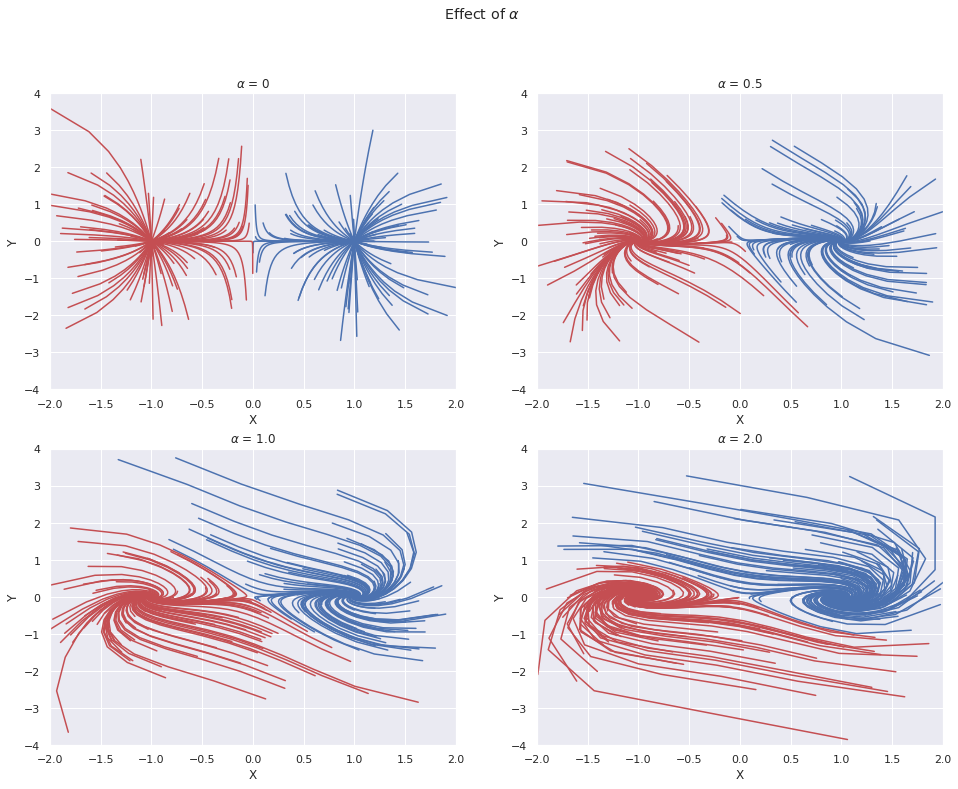

In [5]:
# Plotting Relaxtion Paths


fig, axes = plt.subplots(2, 2, figsize = (16, 12))
alphas = [0, 0.5, 1., 2.]

for (alpha, ax) in zip(alphas, axes.flatten()):
    
    # Generating Relaxtion Paths
    relaxation_paths = []

    for i in tqdm(range(200)):
        runner = FancyWellIntegrator(alpha)
        looker = TrajectoryObserver(runner)
        make_observations(runner, looker, 100, 0.1)
        ds = looker.observations
        relaxation_paths.append(ds)

    # Sorting by end point
    hot_list = []
    cold_list = []

    for ds in relaxation_paths:
        if hot_test(ds):
            hot_list.append(ds)
        if cold_test(ds):
            cold_list.append(ds)

    #Plotting Result
    for ds in hot_list:
        ax.plot(ds.x, ds.y, 'b')
    for ds in cold_list:
        ax.plot(ds.x, ds.y, 'r')
           
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'$\\alpha$ = {alpha}')
    ax.set_xlim((-2, 2))
    ax.set_ylim((-4, 4))


fig.suptitle('Effect of $\\alpha$')
fig.show()

In [6]:
fig.show()

## Relaxation Paths

In [7]:
alpha = 0.
runner = FancyWellIntegrator(alpha)
x0 = rm.normal(loc=0, scale = 1.e-3, size=2)
print(x0)
runner.state = x0
looker = TrajectoryObserver(runner)
make_observations(runner, looker, 100, 0.1)

[-0.00022814  0.00114863]


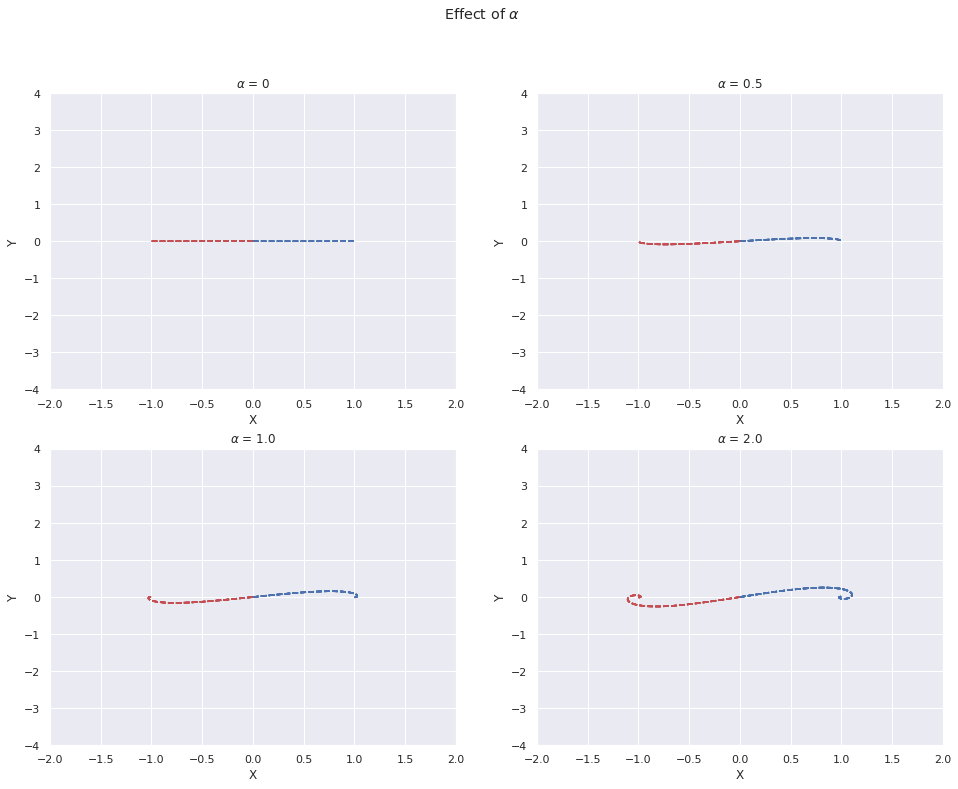

In [8]:
# Plotting Relaxtion Paths

fig, axes = plt.subplots(2, 2, figsize = (16, 12))
alphas = [0, 0.5, 1., 2.]

for (alpha, ax) in zip(alphas, axes.flatten()):
    
    # Generating Relaxtion Paths
    relaxation_paths = []

    for i in tqdm(range(20)):
        runner = FancyWellIntegrator(alpha)
        x0 = rm.normal(loc=0, scale = 1.e-3, size=2)
        runner.state = x0
        looker = TrajectoryObserver(runner)
        make_observations(runner, looker, 100, 0.1)
        ds = looker.observations
        relaxation_paths.append(ds)

    # Sorting by end point
    hot_list = []
    cold_list = []

    for ds in relaxation_paths:
        if hot_test(ds):
            hot_list.append(ds)
        if cold_test(ds):
            cold_list.append(ds)

    #Plotting Result
    for ds in hot_list:
        ax.plot(ds.x, ds.y, 'b--')
    for ds in cold_list:
        ax.plot(ds.x, ds.y, 'r--')
           
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'$\\alpha$ = {alpha}')
    ax.set_xlim((-2, 2))
    ax.set_ylim((-4, 4))


fig.suptitle('Effect of $\\alpha$')
fig.show()

In [9]:
import matplotlib.cm as cm 

In [10]:
def fancy_well_background(alpha, ax):
    
    # Plot Misc
    ax.set_xlim((-1.5, 1.5))
    ax.set_ylim((-1, 1))
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    
    # alpha label
    ax.text(-1.2, 0.8, fr'$\alpha = {alpha:.2f}$', fontsize=15, bbox={'facecolor': '1', 'pad': 10}) #

    # Gradient Arrows
    x = np.linspace(-1.5, 1.5, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    vx = X*(X**2 - 1) - 2 * alpha * Y 
    vy = alpha *X*(X**2 - 1) + 2 * Y 
    speed = np.sqrt(vx**2 + vy**2)
    ax.streamplot(x, y, -vx, -vy, color='1')
    ax.pcolormesh(X, Y, speed, cmap = 'Blues') 
    
    # Fixed Points
    cold_point = plt.Circle((-1, 0), 0.05, color='r')
    hot_point = plt.Circle((1, 0), 0.05, color='r')
    mid_point = plt.Circle((0, 0), 0.05, color='g')
    ax.add_patch(cold_point)
    ax.add_patch(hot_point)
    ax.add_patch(mid_point)
    return ax




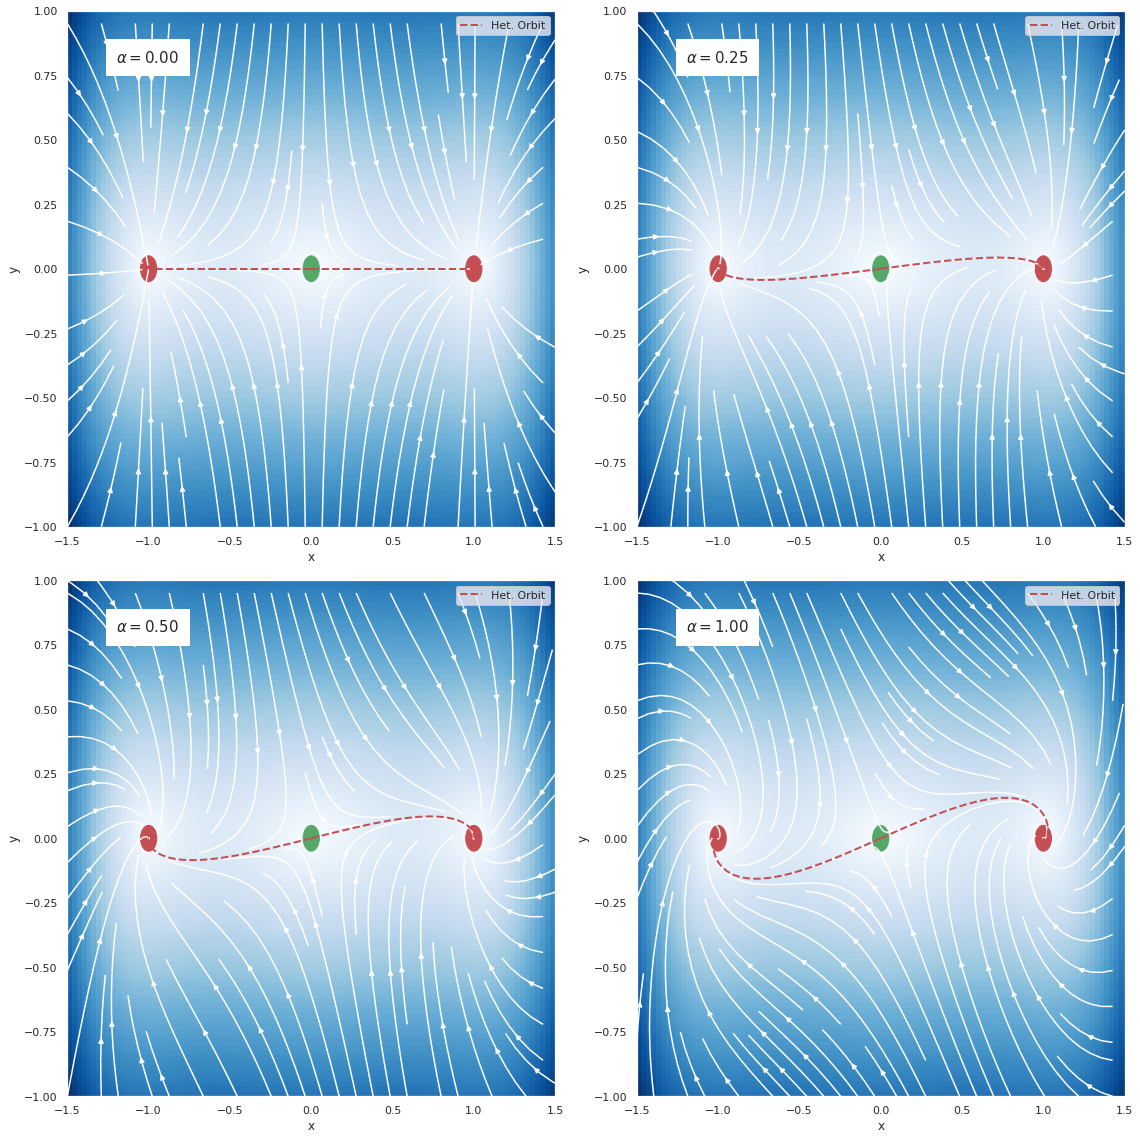

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (16, 16))

alphas = [0., 0.25, 0.5, 1.]

# Plot Streamfield and markers

for a, ax in zip(alphas, axes.flatten()):
    fancy_well_background(a, ax)


# Plot Relaxations

for a, ax in zip(alphas, axes.flatten()):

    runner = FancyWellIntegrator(a)
    saddle = np.zeros(2)
    
    # Cold Relaxation - ends up at cold point
    runner.state = saddle - np.array([1.e-3, 0])
    looker = TrajectoryObserver(runner)
    make_observations(runner, looker, 100, 0.1)
    cold_relaxation = looker.observations
    
    # Hot Relaxation - ends up at hot point
    runner.state = saddle + np.array([1.e-3, 0])
    looker = TrajectoryObserver(runner)
    make_observations(runner, looker, 100, 0.1)
    hot_relaxation = looker.observations
    
    ax.plot(cold_relaxation.x, cold_relaxation.y, 'r--', lw=2, label ='Het. Orbit')
    ax.plot(hot_relaxation.x, hot_relaxation.y, 'r--', lw=2)
    ax.legend()
    
    # Saving Results
    save_dir = f'Data/alpha{a}/'.replace('.', '_')
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    cold_relaxation.to_netcdf(save_dir + 'cold-relaxation.nc')
    hot_relaxation.to_netcdf(save_dir + 'hot-relaxation.nc')
    
fig.tight_layout()

In [12]:
R = np.array([[0, -1], [1, 0]])
(np.eye(2) + alpha * R) @ V([X, Y])

NameError: name 'X' is not defined

In [ ]:
grad_V([X, Y]).shape

In [13]:
cold_relaxation.to_netcdf('cold-relaxation.nc')

<xarray.Dataset>
Dimensions:  (time: 100)
Coordinates:
  * time     (time) float64 0.1 0.2 0.3 0.4 0.5 0.6 ... 9.5 9.6 9.7 9.8 9.9 10.0
Data variables:
    x        (time) float64 -0.001115 -0.001262 -0.001443 ... -1.0 -1.0 -1.0
    y        (time) float64 -9.58e-05 -0.0001861 ... 5.85e-06 4.507e-06
Attributes:
    alpha:    1.0